# Use narrow data from BioLector I

In [1]:
import numpy
import pandas
import pathlib
import matplotlib.cm
from matplotlib import pyplot
import seaborn
import bletl

### Parse the raw data file

In [2]:
filepath = pathlib.Path(r'..\bletl\tests\data\BL1\NT_1200rpm_30C_DO-GFP75-pH-BS10_12min_20171221_121339.csv')
bldata = bletl.parse(filepath, lot_number=1515, temp=30)
bldata

{'DO': <bletl.core.FilterTimeSeries at 0x1f27bb16448>,
 'GFP75': <bletl.core.FilterTimeSeries at 0x1f27bdf2888>,
 'pH': <bletl.core.FilterTimeSeries at 0x1f27bb0cf48>,
 'BS10': <bletl.core.FilterTimeSeries at 0x1f27bd04a48>}

### Get narrow data

In [3]:
narrow = bldata.get_unified_narrow_data()
narrow.head()

,well,cycle,time,DO,GFP75,pH,BS10
0,A01,1,0.00523,96.605204,54.76,7.590411,11.786574
1,A01,2,0.21047,98.859258,54.62,7.576478,12.167130
2,A01,3,0.41047,99.428472,54.84,7.562804,12.210841
3,A01,4,0.61056,102.309616,55.01,7.549377,12.474002
4,A01,5,0.81047,104.657712,54.90,7.549377,11.918877


### A quick plot using seaborn

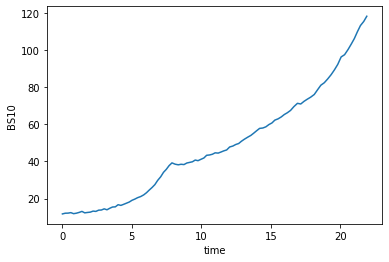

In [4]:
seaborn.lineplot(data=narrow.groupby('well').get_group('A01'), x='time', y='BS10')

### Replicate condensation using seaborn

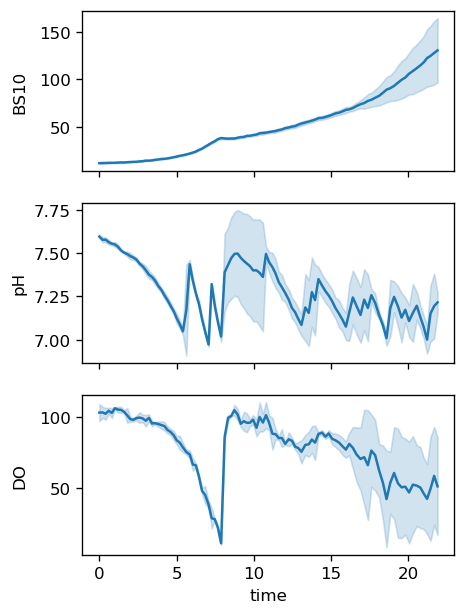

In [5]:
replicate_group = ['A01', 'B01', 'C01']
sub = narrow.query('well in @replicate_group')

fig, ax = pyplot.subplots(3, figsize=(4,6), sharex=True, dpi=120)
seaborn.lineplot(data=sub, x='time', y='BS10', ci='sd', ax=ax[0])
seaborn.lineplot(data=sub, x='time', y='pH', ci='sd', ax=ax[1])
seaborn.lineplot(data=sub, x='time', y='DO', ci='sd', ax=ax[2])
fig.align_ylabels()